# The Importance of Phase in Image


### Taufiq Widjanarko
##### January 2026
###### twidjana@gmail.com

<b>1. Introduction </b>

- Based on seminal work from Oppenheim & Lim (Proc.of IEEE,69,529,1981)
- Emphasizing the quintessential role of phase in image → carrying the details of an image
- ‘Classic paper’ → so far has been cited more than 2,600* times! (source: Google Scholar - Jan 2026)

<b>2. Idea</b>
- Following a Fourier Transform operation (in this case: FFT), an image can be decomposed into its amplitude and phase components (see Fig.1)
- As a result we can 'mathematically express' an image as $\textit A\angle \theta$ , where $\textit A$, $\angle$, & $\theta$ are the image Amplitude, angle, and Phase, respectively.

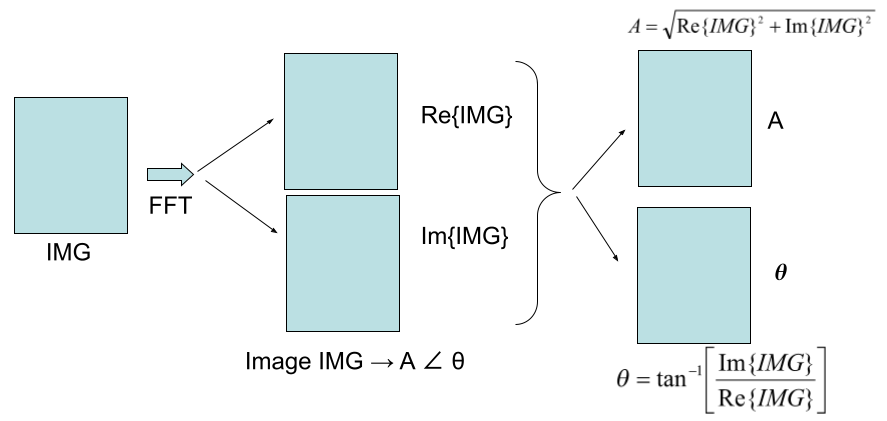

<figure>
    <figcaption>Figure 1: FFT decomposition of an image into its Amplitude & Phase components</figcaption>
</figure>

<b>3. Swap the amplitudes & phases of the two images </b>
- To illustrate the idea above 
    - we open two images
    - take the FFT of each image
     - Two images, with their amplitudes and phases are $A_1$ , $\theta_1$ and  $A_2$ , $\theta_2$  , respectively where subscripts 1 and 2 refer to image 1 and 2.
     - Swap the amplitude and phase between the two images
- The test is to evaluate which component, i.e. amplitude $A$ or phase $\theta$ , that carries image details

Text(0.5, 1.0, 'Image 2: eagle')

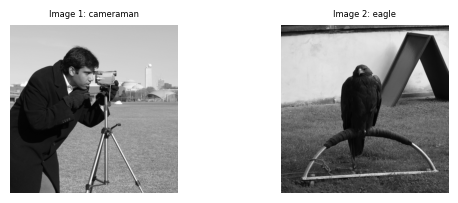

In [6]:
#%matplotlib inline
#1. Open two images: Image 1: cameraman, Image 2: eagle
#(the images are taken from scikit sample images)
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = Image.open("cameraman.png")
img2 = Image.open("eagle.png")

# Resize both images
sz = 512      #image size
ftsz = 6      #font size for image title

# Convert back to NumPy array
img1 = np.array(img1.resize((sz, sz), Image.LANCZOS))
img2 = np.array(img2.resize((sz, sz), Image.LANCZOS))

#Display the resized images
plt.subplot(2,2,1)
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.title('Image 1: cameraman',fontsize=ftsz)

plt.subplot(2,2,2)
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.title('Image 2: eagle',fontsize=ftsz)

<figure>
    <figcaption>Figure 2: Image 1 - 'Cameraman' (left), Image 2 - 'Eagle' (right)</figcaption>
</figure>

In [7]:
#2.Extracting the amplitude and phase of each image (see Fig.1 for the diagram)
img1Mag = np.abs(np.fft.fft2(img1))
img1Phase = np.angle(np.fft.fft2(img1))

img2Mag = np.abs(np.fft.fft2(img2))
img2Phase = np.angle(np.fft.fft2(img2))

<b>3.a. Amplitude Swapping </b>
- Amplitude of image 1 $A_1$ will be swapped with amplitude of image 2 $A_2$ 
- The new images after Inverse Fourier Transform (IFFT) will be $A_2 \angle \theta_1$ and $A_1 \angle \theta_2$ (see diagram in Figs.3.a for details)

<figure>
    <img src="images/IoP_2_diag1_AmplSwapDiag.png">
    <figcaption>Figure 3.a: Amplitude Swapping diagram</figcaption>
</figure>

Text(0.5, 1.0, 'A=mag(img1), $\\theta$=phase(img2)')

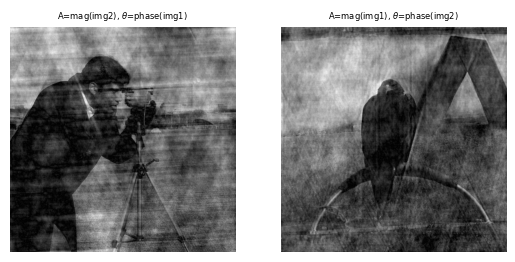

In [8]:
#3.A.Swapping: Amplitude (see Fig.3 for the detailed diagram)
#Amplitude swapping 1: magnitude: mag(img2) & phase: angle(img1)
mag2phase1 = img2Mag * np.exp(1j*img1Phase) 
plt.subplot(1,2,1)
plt.imshow(np.abs(np.fft.ifft2(mag2phase1)), cmap='gray')
plt.axis('off')
plt.title(r"A=mag(img2), $\theta$=phase(img1)",fontsize=ftsz)

#Amplitude swapping 2: magnitude: mag(img1) & phase: angle(img2)
mag1phase2 = img1Mag * np.exp(1j*img2Phase) 
plt.subplot(1,2,2)
plt.imshow(np.abs(np.fft.ifft2(mag1phase2)), cmap='gray')
plt.axis('off')
plt.title(r"A=mag(img1), $\theta$=phase(img2)",fontsize=ftsz)

<figure>
    <figcaption>Figure 3.a (top): Amplitude Swapping results: $A_2\angle\theta_1$ (left), and $A_1\angle\theta_2$ (right) </figcaption>
</figure>

<b> Amplitude Swapping process </b>

<figure>
    <img src="images/IoP_2_diag2_AmplSwapRes.png">
    <figcaption>Figure 3.a (lower): Swapping the amplitudes of the two images whilst keeping their phase information</figcaption>
</figure>

- Swapping the amplitude, apart from adding noise, doesn’t provide the image ‘content’
- $\rightarrow$  <b><i>Amplitude doesn’t carry the image information</i></b>


<b> 3.b. Phase Swapping </b>
- Phase of image 1 ($\theta_1$) will be swapped with the phase of image 2 ($\theta_2$) 
- The new images after Inverse Fourier Transform (IFFT) will be $A_1 \angle \theta_2$ and $A_2 \angle \theta_1$ (see diagram in Fig.4)

<figure>
    <img src="images/IoP_2_diag3_PhaseSwapDiag.png">
    <figcaption>Figure 3.a (top): Phase Swapping components</figcaption>
</figure>

Text(0.5, 1.0, '$A\\angle\\theta$: A=mag(img2), $\\theta$ = phase(img1)')

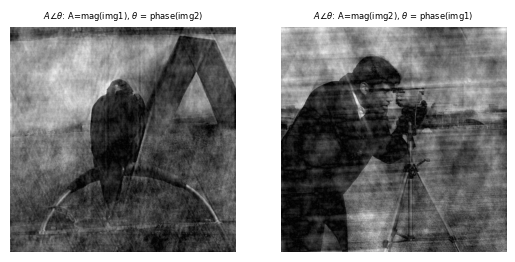

In [9]:
#3.B. Swapping: Phase (see Fig.4 for the detailed diagram)
#phase swapping 1: magnitude: mag(img1), phase: angle(img2)
mag1phase2 = img1Mag * np.exp(1j*img2Phase) 
plt.subplot(1,2,1)
plt.imshow(np.abs(np.fft.ifft2(mag1phase2)), cmap='gray')
plt.axis('off')
plt.title(r'$A\angle\theta$: A=mag(img1), $\theta$ = phase(img2)',fontsize=ftsz)

#phase swapping 2: magnitude: mag(img1), phase: angle(img2)
mag2phase1=img2Mag * np.exp(1j*img1Phase)
plt.subplot(1,2,2)
plt.imshow(np.abs(np.fft.ifft2(mag2phase1)), cmap='gray')
plt.axis('off')
plt.title(r'$A\angle\theta$: A=mag(img2), $\theta$ = phase(img1)',fontsize=ftsz)

<b> Phase Swapping process </b>

<figure>
    <img src="images/IoP_2_diag2_PhaseSwapRes.png">
    <figcaption>Figure 3.b (lower): Swapping the phases of the two images whilst keeping their amplitudes information</figcaption>
</figure>

- The test results show, despite the presence of noise, swapping the phase will change the images
- Therefore <b><i>phase carries the image details</i></b>


<b> 4. Arbitrary amplitude with unchanged phase information </b>
- The results of previous amplitude and phase swap tests show that, provided the phase information is preserved, the amplitude of image therefore can be set to any <i>arbritray</i> value whilst maintaining the details by keeping the phase information intact. 
- The following test is to assign random value to the amplitude each image but keep the phase values intact

Text(0.5, 1.0, 'A$\\angle\\theta$ - A=rand(512x512), $\\theta$=phase(img2)')

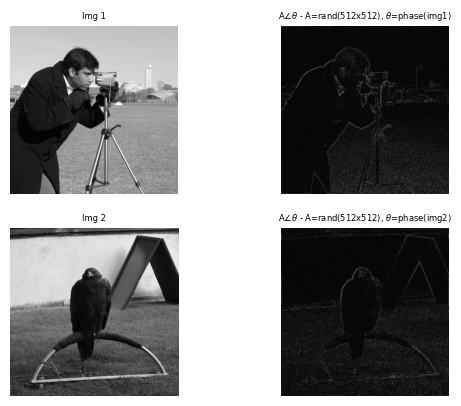

In [10]:
#4. Unit amplituides
OnesSzSq = np.ones([sz,sz]) #setting unity ('ones') matrix for unit amplitude

#Unit amplitude 1: magnitude: ones(512x512), phase: angle(img1)
onesSzPhase1 = OnesSzSq * np.exp(1j*img1Phase)
#Unit amplitude 2: magnitude: ones(256x256), phase: angle(img2)
onesSzPhase2 = OnesSzSq * np.exp(1j*img2Phase)

#Displaying the results

plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.title("Img 1",fontsize=ftsz)

plt.subplot(2,2,2)
plt.imshow(np.abs(np.fft.ifft2(onesSzPhase1)), cmap='gray')
plt.axis('off')
plt.title(r"A$\angle\theta$ - A=rand(512x512), $\theta$=phase(img1)", fontsize=ftsz)

plt.subplot(2,2,3)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title("Img 2",fontsize=ftsz)

plt.subplot(2,2,4)
plt.imshow(np.abs(np.fft.ifft2(onesSzPhase2)), cmap='gray')
plt.axis('off')
plt.title(r"A$\angle\theta$ - A=rand(512x512), $\theta$=phase(img2)", fontsize=ftsz)

<figure>
    <figcaption>Figure 5: Left: original images of Image 1 (top) & Image 2 (bottom). Right: IFFT results of random amplitude and phase of image 1 (top), and phase of image 2 (bottom) </figcaption>
</figure>

- Fig. 4 shows that as long as the phase information is unchanged (not swapped), with any random amplitude, we can still perceive the original images (despite the dimmed intensity)
 -  $\rightarrow $ <b> Phase information preserves the content of an image </b>